# EDA of the tweets of realDonaldTrump

In [2]:
import json
from pathlib import Path
import sys
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

In [48]:
!{sys.executable} -m pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/93/4b/52da6b1523d5139d04e02d9e26ceda6146b48f2a4e5d2abfdf1c7bac8c40/matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ae/23/147de658aabbf968324551ea22c0c13a00284c4ef49a77002e91f79657b7/kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl


## Read them in and turn into DataFrame

okay there is the json, but there is the more accurate csv

In [4]:
tweet_path = Path("../data/realDonaldTrump.json")
tweet_path.exists()

True

In [23]:
tweet_dict = dict()

with open(tweet_path, 'r') as read_file:
    for thing in read_file:
        tweet_json = json.loads(thing)
        
        # combine time and date
        date_time = tweet_json["date"] + " " + tweet_json["time"]
        time_zone = tweet_json['timezone']
        
        tweet_dict[date_time] = tweet_json["id"]

In [21]:
date_time

'2017-01-01 06:00:10'

In [22]:
json.loads(thing)

{'id': 815422340540547073,
 'conversation_id': '815422340540547073',
 'created_at': 1483246810000,
 'date': '2017-01-01',
 'time': '06:00:10',
 'timezone': 'CEST',
 'user_id': 25073877,
 'username': 'realdonaldtrump',
 'name': 'Donald J. Trump',
 'place': '',
 'tweet': 'TO ALL AMERICANS-\n#HappyNewYear & many blessings to you all! Looking forward to a wonderful & prosperous 2017 as we work together to #MAGA🇺🇸 pic.twitter.com/UaBFaoDYHe',
 'mentions': [],
 'urls': [],
 'photos': ['https://pbs.twimg.com/media/C1D2SsLVEAIn1UJ.jpg'],
 'replies_count': 19020,
 'retweets_count': 27943,
 'likes_count': 112710,
 'hashtags': ['#happynewyear', '#maga'],
 'cashtags': [],
 'link': 'https://twitter.com/realDonaldTrump/status/815422340540547073',
 'retweet': False,
 'quote_url': '',
 'video': 0,
 'near': '',
 'geo': '',
 'source': '',
 'user_rt_id': '',
 'user_rt': '',
 'retweet_id': '',
 'reply_to': [{'user_id': '25073877', 'username': 'realDonaldTrump'}],
 'retweet_date': '',
 'translate': '',
 't

In [28]:
df = pd.DataFrame.from_dict(tweet_dict, orient='index', columns=['ID'])

In [32]:
df.index = pd.to_datetime(df.index)

## CSV

In [3]:
tweet_path = Path("../data/realDonaldTrump.csv")
tweet_path.exists()

True

In [19]:
df = pd.read_csv(tweet_path)


In [20]:
df.index = pd.to_datetime(df['created_at'])

In [21]:
df = pd.DataFrame(df['id_str'])

In [23]:
df.columns = ['ID']

In [24]:
df.head()

,ID
created_at,
2020-04-28 20:24:20,1255231394923646976
2020-04-28 20:14:31,1255228926428942339
2020-04-28 20:13:47,1255228739027456001
2020-04-28 14:43:53,1255145720136359945
2020-04-28 14:04:50,1255135893557403648


## Quantitative description

### Per day, just in general

In [25]:
by_day = df.groupby(df.index.date).count()
by_day["ID"].mean()

14.564529558701082

In [26]:
by_day["ID"].std()

13.730539227066087

In [27]:
daily_count = pd.DataFrame.from_dict(Counter(by_day["ID"]), orient='index', columns=['count']).sort_index()

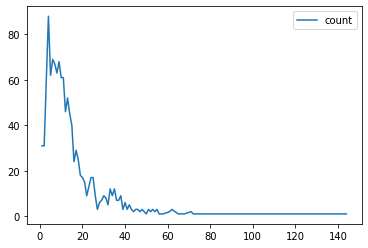

In [28]:
daily_count.plot()

In [29]:
daily_count['probability'] = daily_count['count'] / daily_count['count'].sum()

In [30]:
daily_count.head()

,count,probability
1,31,0.025812
2,31,0.025812
3,60,0.049958
4,88,0.073272
5,62,0.051624


### By Day of Week

Monday = 0

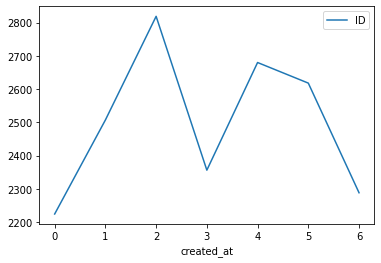

In [31]:
day_of_week = df.groupby(df.index.dayofweek).count()

day_of_week.plot()

## By Hour

Honestly, he probably does sleep for 4 hours a night

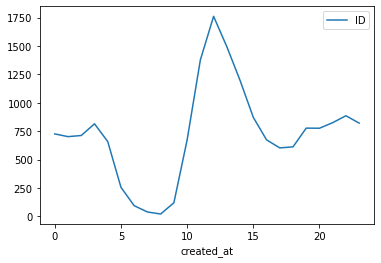

In [32]:
by_hour = df.groupby(df.index.hour).count()
by_hour.plot()

## A priori weekly odds

tl;dr we just see what the odds are of each of the buckets at the start of each week

In [33]:
by_day["sum_7"] = by_day.rolling(window=7).sum()

In [34]:
by_day.tail(8
           )

,ID,sum_7
2020-04-21,36,187.0
2020-04-22,22,197.0
2020-04-23,33,223.0
2020-04-24,30,238.0
2020-04-25,27,194.0
2020-04-26,17,176.0
2020-04-27,38,203.0
2020-04-28,21,188.0
